In [73]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ddosad/auto-sales-data")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\bryan\.cache\kagglehub\datasets\ddosad\auto-sales-data\versions\1


In [74]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [75]:
print("Dataset path:", path)
print("Files in dataset folder:", os.listdir(path))

Dataset path: C:\Users\bryan\.cache\kagglehub\datasets\ddosad\auto-sales-data\versions\1
Files in dataset folder: ['Auto Sales data.csv']


In [76]:
csv_filepath = os.path.join(path, "Auto Sales data.csv")

df = pd.read_csv(csv_filepath)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [113]:
#general statistics
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [79]:
#missing values?
print(df.isnull().sum())

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [80]:
df.loc[:,'STATUS'].value_counts()

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [81]:
#Extracting only Shipped orders for more accurate count
sales_shipped = df.loc[(df.loc[:,'STATUS'] == 'Shipped'),:]
sales_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,10315,40,55.69,5,2227.60,29/10/2019,2955,Shipped,Ships,54,S72_3212,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
2741,10337,42,97.16,5,4080.72,21/11/2019,2934,Shipped,Ships,54,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,10022,USA,Hernandez,Maria,Medium
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium


In [115]:


customer = pd.DataFrame(sales_shipped.groupby(['CUSTOMERNAME']).agg({
    'DAYS_SINCE_LASTORDER':'min',
    'ORDERNUMBER':'count',
    'SALES':'sum'
})).sort_values(by='ORDERNUMBER', ascending=False).reset_index()

customer = cust.rename(columns={
    'CUSTOMERNAME':'Customer',
    'DAYS_SINCE_LASTORDER':'Recency',
    'ORDERNUMBER':'Frequency',
    'SALES':'Monetary'
})

customer

,Customer,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,Final_RFM_Score,Priority
0,Mini Gifts Distributors Ltd.,219,178,647596.31,0.853933,0.988764,0.988764,9.685393,Champions
1,"Australian Collectors, Co.",229,55,200995.41,0.820225,0.977528,0.977528,9.539326,Champions
2,Euro Shopping Channel,299,213,741512.50,0.685393,1.000000,1.000000,9.528090,Champions
3,"Anna's Decorations, Ltd",131,46,153996.13,0.955056,0.932584,0.932584,9.359551,Champions
4,Salzburg Collectables,188,40,149798.63,0.898876,0.882022,0.921348,9.069663,Champions
...,...,...,...,...,...,...,...,...,...
84,"Bavarian Collectables Imports, Co.",801,14,34993.92,0.112360,0.157303,0.089888,1.121348,Lost
85,Boards & Toys Co.,410,3,9129.35,0.516854,0.011236,0.011236,0.870787,Lost
86,Royale Belge,737,8,33440.10,0.134831,0.050562,0.067416,0.728090,Lost
87,Auto-Moto Classics Inc.,1353,8,26479.26,0.011236,0.050562,0.044944,0.414607,Lost


In [117]:
# Creating scores for RFM Analysis
customer['Recency_score'] = (customer['Recency'].rank(ascending=False))/max(customer['Recency'].rank(ascending=False))
customer['Frequency_score'] = (customer['Frequency'].rank(ascending=True))/max(customer['Frequency'].rank(ascending=True))
customer['Monetary_score'] = (customer['Monetary'].rank(ascending=True))/max(customer['Monetary'].rank(ascending=True))

display(cust)

,Customer,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,Final_RFM_Score,Priority
0,Mini Gifts Distributors Ltd.,219,178,647596.31,0.853933,0.988764,0.988764,9.685393,Champions
1,"Australian Collectors, Co.",229,55,200995.41,0.820225,0.977528,0.977528,9.539326,Champions
2,Euro Shopping Channel,299,213,741512.50,0.685393,1.000000,1.000000,9.528090,Champions
3,"Anna's Decorations, Ltd",131,46,153996.13,0.955056,0.932584,0.932584,9.359551,Champions
4,Salzburg Collectables,188,40,149798.63,0.898876,0.882022,0.921348,9.069663,Champions
...,...,...,...,...,...,...,...,...,...
84,"Bavarian Collectables Imports, Co.",801,14,34993.92,0.112360,0.157303,0.089888,1.121348,Lost
85,Boards & Toys Co.,410,3,9129.35,0.516854,0.011236,0.011236,0.870787,Lost
86,Royale Belge,737,8,33440.10,0.134831,0.050562,0.067416,0.728090,Lost
87,Auto-Moto Classics Inc.,1353,8,26479.26,0.011236,0.050562,0.044944,0.414607,Lost


In [84]:
#Final customer scoring
customer.loc[:,'Final_RFM_Score'] = (customer.loc[:,'Recency_score']*0.15 + customeer.loc[:,'Frequency_score']*0.28 + customer.loc[:,'Monetary_score']*0.57)*10 # To scale up the score

customer = customer.sort_values(by='Final_RFM_Score', ascending=False).reset_index(drop=True)

display(customer)

,Customer,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,Final_RFM_Score
0,Mini Gifts Distributors Ltd.,219,178,647596.31,0.853933,0.988764,0.988764,9.685393
1,"Australian Collectors, Co.",229,55,200995.41,0.820225,0.977528,0.977528,9.539326
2,Euro Shopping Channel,299,213,741512.50,0.685393,1.000000,1.000000,9.528090
3,"Anna's Decorations, Ltd",131,46,153996.13,0.955056,0.932584,0.932584,9.359551
4,Salzburg Collectables,188,40,149798.63,0.898876,0.882022,0.921348,9.069663
...,...,...,...,...,...,...,...,...
84,"Bavarian Collectables Imports, Co.",801,14,34993.92,0.112360,0.157303,0.089888,1.121348
85,Boards & Toys Co.,410,3,9129.35,0.516854,0.011236,0.011236,0.870787
86,Royale Belge,737,8,33440.10,0.134831,0.050562,0.067416,0.728090
87,Auto-Moto Classics Inc.,1353,8,26479.26,0.011236,0.050562,0.044944,0.414607


In [121]:
# Categorise the customers on the basis of their RFM scores
customer.loc[(cust.loc[:,'Final_RFM_Score'] > 9.0),'Priority'] = 'Champions'
customer.loc[((cust.loc[:,'Final_RFM_Score'] <= 9.0) & (customer.loc[:,'Final_RFM_Score'] > 8.0)),'Priority'] = 'Loyal'
customer.loc[((cust.loc[:,'Final_RFM_Score'] <= 8.0) & (customer.loc[:,'Final_RFM_Score'] > 6.0)),'Priority'] = 'Potential Loyalist'
customer.loc[((cust.loc[:,'Final_RFM_Score'] <= 6.0) & (customer.loc[:,'Final_RFM_Score'] > 3.5)),'Priority'] = 'Recent'
customer.loc[(cust.loc[:,'Final_RFM_Score'] <= 3.5),'Priority'] = 'Lost'
display(customer)

,Customer,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,Final_RFM_Score,Priority
0,Mini Gifts Distributors Ltd.,219,178,647596.31,0.853933,0.988764,0.988764,9.685393,Champions
1,"Australian Collectors, Co.",229,55,200995.41,0.820225,0.977528,0.977528,9.539326,Champions
2,Euro Shopping Channel,299,213,741512.50,0.685393,1.000000,1.000000,9.528090,Champions
3,"Anna's Decorations, Ltd",131,46,153996.13,0.955056,0.932584,0.932584,9.359551,Champions
4,Salzburg Collectables,188,40,149798.63,0.898876,0.882022,0.921348,9.069663,Champions
...,...,...,...,...,...,...,...,...,...
84,"Bavarian Collectables Imports, Co.",801,14,34993.92,0.112360,0.157303,0.089888,1.121348,Lost
85,Boards & Toys Co.,410,3,9129.35,0.516854,0.011236,0.011236,0.870787,Lost
86,Royale Belge,737,8,33440.10,0.134831,0.050562,0.067416,0.728090,Lost
87,Auto-Moto Classics Inc.,1353,8,26479.26,0.011236,0.050562,0.044944,0.414607,Lost


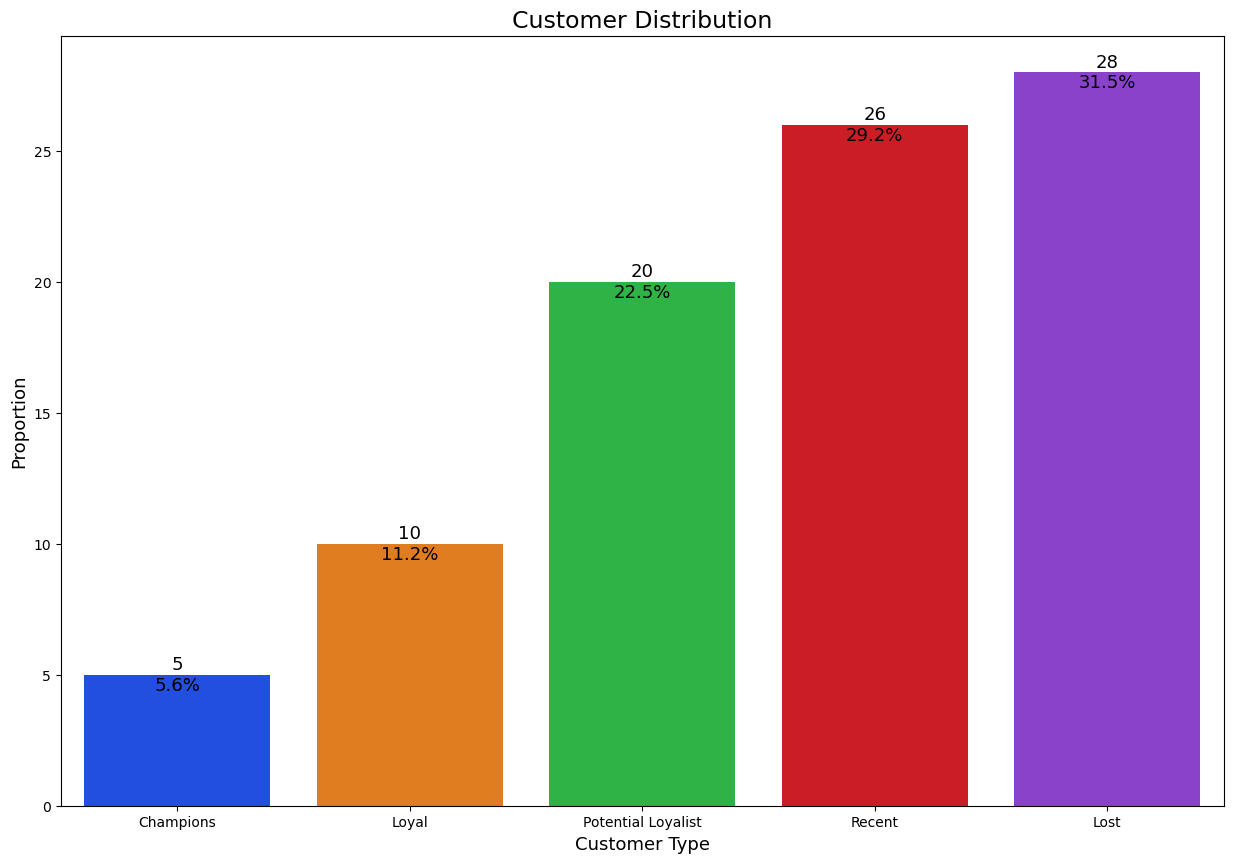

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 'customer' DataFrame with 'Priority' column
# Let's assume 'customer' has a column 'Priority' that indicates customer types like 'High', 'Medium', 'Low'

plt.figure(figsize=(15, 10))

#Use the bright color palette
ax = sns.countplot(x='Priority', data=customer, hue='Priority', palette='bright', legend=False)

#Title and labels
plt.title('Customer Distribution', fontsize=17)
plt.xlabel('Customer Type', fontsize=13)
plt.ylabel('Proportion', fontsize=13)

#Annotate each bar with count and percentage
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / len(cust))
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(f'{int(i.get_height())}\n{percentage}', (x, y), ha='center', va='center', fontsize=13)

# Show the plot
plt.show()
